In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('train_updated.csv')

#dropped rows with missing data 
df = df.dropna()

In [6]:
df.describe()

,deviceid,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
count,33832.000000,33832.000000,33832.00000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,...,33832.000000,33832.00000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000
mean,27523.530415,16.182491,16.54314,16.267959,16.344610,-0.042742,-0.052521,25.610492,26.391300,25.856262,...,84.833228,25.23022,2.153646,351.412834,348.205980,16.354944,26.083136,4159.255202,20.577940,42.438081
std,12966.496729,15.334782,15.43497,15.305808,15.196508,0.797105,0.759198,29.138369,29.464778,29.236861,...,14.817297,34.50949,2.125769,12.142624,12.632874,3.385811,6.484972,10.783707,15.987928,9.826729
min,5000.000000,1.510000,1.06000,0.040000,1.070000,-76.946667,-42.130000,0.520000,0.700000,1.070000,...,21.062500,0.00000,0.294118,306.169000,302.499048,5.522667,5.570667,4114.466667,1.000000,11.093333
25%,16294.750000,4.910000,4.92000,4.910000,4.900000,-0.063333,-0.100000,4.200000,4.210000,4.200000,...,74.850000,4.40000,1.066667,343.071682,339.657667,14.021681,21.606456,4151.940257,11.571429,35.682283
50%,27504.500000,5.770000,5.83000,5.780000,5.780000,0.000000,-0.003333,5.860000,5.920000,5.850000,...,84.811012,17.87500,1.500000,351.126905,347.891278,16.221378,25.809028,4159.133333,16.727273,42.036583
75%,38774.250000,29.770000,30.79000,30.010000,29.700000,0.046667,0.060000,49.662500,51.330000,50.142500,...,94.739130,37.00000,2.375000,359.403437,356.521094,18.579420,30.316052,4166.500000,24.333333,48.875312
max,49998.000000,82.550000,98.89000,81.000000,81.890000,9.556667,17.913333,104.060000,110.560000,108.170000,...,145.333333,2013.00000,34.933333,405.446111,403.850000,30.937059,55.925789,4206.235294,418.916667,86.853158


In [7]:
df.columns

Index(['deviceid', 'avg_time_charging_lag1', 'avg_time_charging_lag2',
       'avg_time_charging_lag3', 'avg_time_charging_lag7',
       'charging_rate_lag3', 'charging_rate_lag7', 'avg_time_discharging_lag1',
       'avg_time_discharging_lag2', 'avg_time_discharging_lag3',
       'avg_time_discharging_lag7', 'discharging_rate_lag3',
       'discharging_rate_lag7', 'fail_7', 'charge_cycle_time_below_12',
       'avg_time_charging_lag4', 'avg_time_discharging_lag4',
       'avg_time_charging_lag5', 'avg_time_discharging_lag5',
       'avg_time_charging_lag6', 'avg_time_discharging_lag6',
       'avg_time_charging_lag8', 'avg_time_discharging_lag8',
       'avg_time_charging_lag9', 'avg_time_discharging_lag9',
       'avg_time_charging_lag10', 'avg_time_discharging_lag10',
       'avg_time_charging_lag11', 'avg_time_discharging_lag11',
       'avg_time_charging_lag12', 'avg_time_discharging_lag12',
       'avg_time_charging_lag13', 'avg_time_discharging_lag13',
       'avg_time_charging_

In [8]:
#from lag columns we calculate only: AVG_charging_rate and AVG_discharging_rate

In [9]:
ser_charging_rate = df[['charging_rate_lag3', 'charging_rate_lag4', 'charging_rate_lag5',
       'charging_rate_lag6', 'charging_rate_lag7']].mean(axis=1)
ser_discharging_rate = df[['discharging_rate_lag3',
       'discharging_rate_lag4', 'discharging_rate_lag5',
       'discharging_rate_lag6', 'discharging_rate_lag7',
       'discharging_rate_lag8']].mean(axis=1)

In [10]:
newdf = df[['deviceid', 'chargecycles', 'dischargecycles', 'total_off_time',
       'number_times_restart', 'avg_volt_change_charging',
       'avg_volt_change_discharging', 'avg_time_charging',
       'avg_time_discharging', 'max_voltage_day', 'piececount', 'cycle_time', 'Date Deployed', 'charge_cycle_time_below_12', 'fail_7']]

In [11]:
newdf['AVG_charging_rate'] = ser_charging_rate
newdf['AVG_discharging_rate'] = ser_discharging_rate

/var/folders/8b/n43vy0qj04d0hdqjf03h96bm0000gn/T/ipykernel_17910/280979940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['AVG_charging_rate'] = ser_charging_rate
/var/folders/8b/n43vy0qj04d0hdqjf03h96bm0000gn/T/ipykernel_17910/280979940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['AVG_discharging_rate'] = ser_discharging_rate


In [12]:
newdf

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,Date Deployed,charge_cycle_time_below_12,fail_7,AVG_charging_rate,AVG_discharging_rate
2,16107,80.380952,80.333333,2.333333,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,10/31/19,False,0,-0.116667,-0.258333
3,27362,91.736842,91.684211,10.789474,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,10/1/19,False,0,0.368000,-0.008889
4,19463,71.066667,70.733333,14.266667,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,9/13/19,True,0,0.304667,-0.355000
5,30054,100.900000,100.550000,10.700000,2.150000,350.345500,346.747500,12.878500,19.621000,4151.600000,6.375000,32.499500,10/5/19,False,0,0.163333,0.147778
6,26431,72.130435,71.869565,60.304348,1.956522,358.789130,353.025652,17.384783,27.495217,4170.652174,20.500000,44.880000,9/13/19,False,0,1.252000,0.565556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,16284,83.434783,82.956522,17.739130,2.782609,365.399130,354.915217,13.880435,23.077391,4162.913043,70.181818,36.957826,9/5/19,True,1,-0.037333,0.215556
40496,49732,64.866667,64.733333,0.266667,1.066667,378.554667,374.952667,17.673333,28.495333,4181.600000,11.888889,46.168667,9/18/19,True,1,-0.202000,0.063333
40497,43158,84.727273,84.590909,6.727273,2.227273,345.429091,342.216818,17.871818,29.766364,4157.045455,26.400000,47.638182,10/18/19,True,1,0.347333,-0.678889
40498,5860,94.100000,94.000000,24.050000,6.750000,364.964000,362.155500,14.557000,22.894000,4171.650000,17.714286,37.451000,10/2/19,True,0,0.115333,0.011111


In [13]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33832 entries, 2 to 40499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     33832 non-null  int64  
 1   chargecycles                 33832 non-null  float64
 2   dischargecycles              33832 non-null  float64
 3   total_off_time               33832 non-null  float64
 4   number_times_restart         33832 non-null  float64
 5   avg_volt_change_charging     33832 non-null  float64
 6   avg_volt_change_discharging  33832 non-null  float64
 7   avg_time_charging            33832 non-null  float64
 8   avg_time_discharging         33832 non-null  float64
 9   max_voltage_day              33832 non-null  float64
 10  piececount                   33832 non-null  float64
 11  cycle_time                   33832 non-null  float64
 12  Date Deployed                33832 non-null  object 
 13  charge_cycle_tim

In [ ]:
newdf.drop(columns=["deviceid","fail_7"]).boxplot(figsize=(30,15.5))


plt.show()

In [ ]:
newdf.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))


plt.show()

In [15]:
failed = newdf[newdf.fail_7 == 1].copy()

In [16]:
failed.shape


(8241, 17)

In [17]:
failed.describe()

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7,AVG_charging_rate,AVG_discharging_rate
count,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.0,8241.000000,8241.000000
mean,27506.300206,86.516089,86.399927,25.676160,2.240825,354.074201,350.941478,16.022233,25.477402,4161.253563,20.815888,41.499635,1.0,-0.036476,-0.082903
std,12873.927190,14.645644,14.682147,26.840762,2.195311,12.166566,12.662482,3.356554,6.448630,10.721050,17.012989,9.762503,0.0,0.311706,0.517226
min,5011.000000,30.600000,30.466667,0.000000,0.388889,315.462400,310.685882,5.636000,5.763000,4122.315789,1.666667,11.399000,1.0,-8.298667,-7.851111
25%,16492.000000,76.769231,76.631579,5.333333,1.115385,345.601739,342.154210,13.699375,21.058333,4153.958333,11.692308,34.811667,1.0,-0.154000,-0.287778
50%,27433.000000,86.523810,86.407407,19.100000,1.550000,353.879130,350.568261,15.852941,25.182609,4161.125000,16.833333,41.044762,1.0,-0.011333,-0.046111
75%,38583.000000,96.360000,96.250000,38.035714,2.476190,362.002381,359.230000,18.210417,29.607500,4168.529412,24.250000,47.788636,1.0,0.098000,0.152222
max,49971.000000,145.388889,145.333333,373.700000,33.700000,405.446111,403.850000,29.707333,51.816471,4206.111111,418.916667,79.956667,1.0,2.632000,3.840000


In [18]:
failed.chargecycles.describe()

count    8241.000000
mean       86.516089
std        14.645644
min        30.600000
25%        76.769231
50%        86.523810
75%        96.360000
max       145.388889
Name: chargecycles, dtype: float64

In [19]:
failed.to_csv('failed.csv', index = False)

In [20]:
failed['charge_cycle_time_below_12'].value_counts()

#6993/failed.shape[0] = 84% of devices that failed had charge cycle time below 12 

True     6993
False    1248
Name: charge_cycle_time_below_12, dtype: int64

In [21]:
nofail = newdf[newdf.fail_7 == 0]

In [22]:
nofail['charge_cycle_time_below_12'].value_counts()

#13086/nofail.shape[0] 51% of devices that did not fail had a charge cycle time below 12 

True     13086
False    12505
Name: charge_cycle_time_below_12, dtype: int64

In [23]:
failed.describe()

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7,AVG_charging_rate,AVG_discharging_rate
count,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.000000,8241.0,8241.000000,8241.000000
mean,27506.300206,86.516089,86.399927,25.676160,2.240825,354.074201,350.941478,16.022233,25.477402,4161.253563,20.815888,41.499635,1.0,-0.036476,-0.082903
std,12873.927190,14.645644,14.682147,26.840762,2.195311,12.166566,12.662482,3.356554,6.448630,10.721050,17.012989,9.762503,0.0,0.311706,0.517226
min,5011.000000,30.600000,30.466667,0.000000,0.388889,315.462400,310.685882,5.636000,5.763000,4122.315789,1.666667,11.399000,1.0,-8.298667,-7.851111
25%,16492.000000,76.769231,76.631579,5.333333,1.115385,345.601739,342.154210,13.699375,21.058333,4153.958333,11.692308,34.811667,1.0,-0.154000,-0.287778
50%,27433.000000,86.523810,86.407407,19.100000,1.550000,353.879130,350.568261,15.852941,25.182609,4161.125000,16.833333,41.044762,1.0,-0.011333,-0.046111
75%,38583.000000,96.360000,96.250000,38.035714,2.476190,362.002381,359.230000,18.210417,29.607500,4168.529412,24.250000,47.788636,1.0,0.098000,0.152222
max,49971.000000,145.388889,145.333333,373.700000,33.700000,405.446111,403.850000,29.707333,51.816471,4206.111111,418.916667,79.956667,1.0,2.632000,3.840000


In [24]:
nofail.describe()

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7,AVG_charging_rate,AVG_discharging_rate
count,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.000000,25591.0,25591.000000,25591.000000
mean,27529.079012,84.448991,84.328708,25.086615,2.125572,350.555802,347.325075,16.462087,26.278199,4158.611676,20.501315,42.740286,0.0,-0.046276,-0.109324
std,12996.411761,14.786984,14.825641,36.638247,2.102159,12.010252,12.496750,3.388297,6.484724,10.725044,15.643117,9.828456,0.0,0.360100,0.560480
min,5000.000000,21.312500,21.062500,0.000000,0.294118,306.169000,302.499048,5.522667,5.570667,4114.466667,1.000000,11.093333,0.0,-17.414000,-10.627778
25%,16209.000000,74.458042,74.277778,4.117647,1.055556,342.370588,338.817958,14.120222,21.794568,4151.333333,11.538462,35.936667,0.0,-0.188667,-0.333333
50%,27535.000000,84.458333,84.318182,17.421053,1.470588,350.327619,347.052778,16.342800,26.025500,4158.533333,16.666667,42.345556,0.0,-0.024000,-0.065556
75%,38829.500000,94.375000,94.263158,36.681818,2.333333,358.459417,355.533442,18.696644,30.544333,4165.804762,24.357143,49.220000,0.0,0.106667,0.152222
max,49998.000000,140.400000,140.333333,2013.000000,34.933333,403.217895,401.475294,30.937059,55.925789,4206.235294,369.000000,86.853158,0.0,3.878667,5.873333


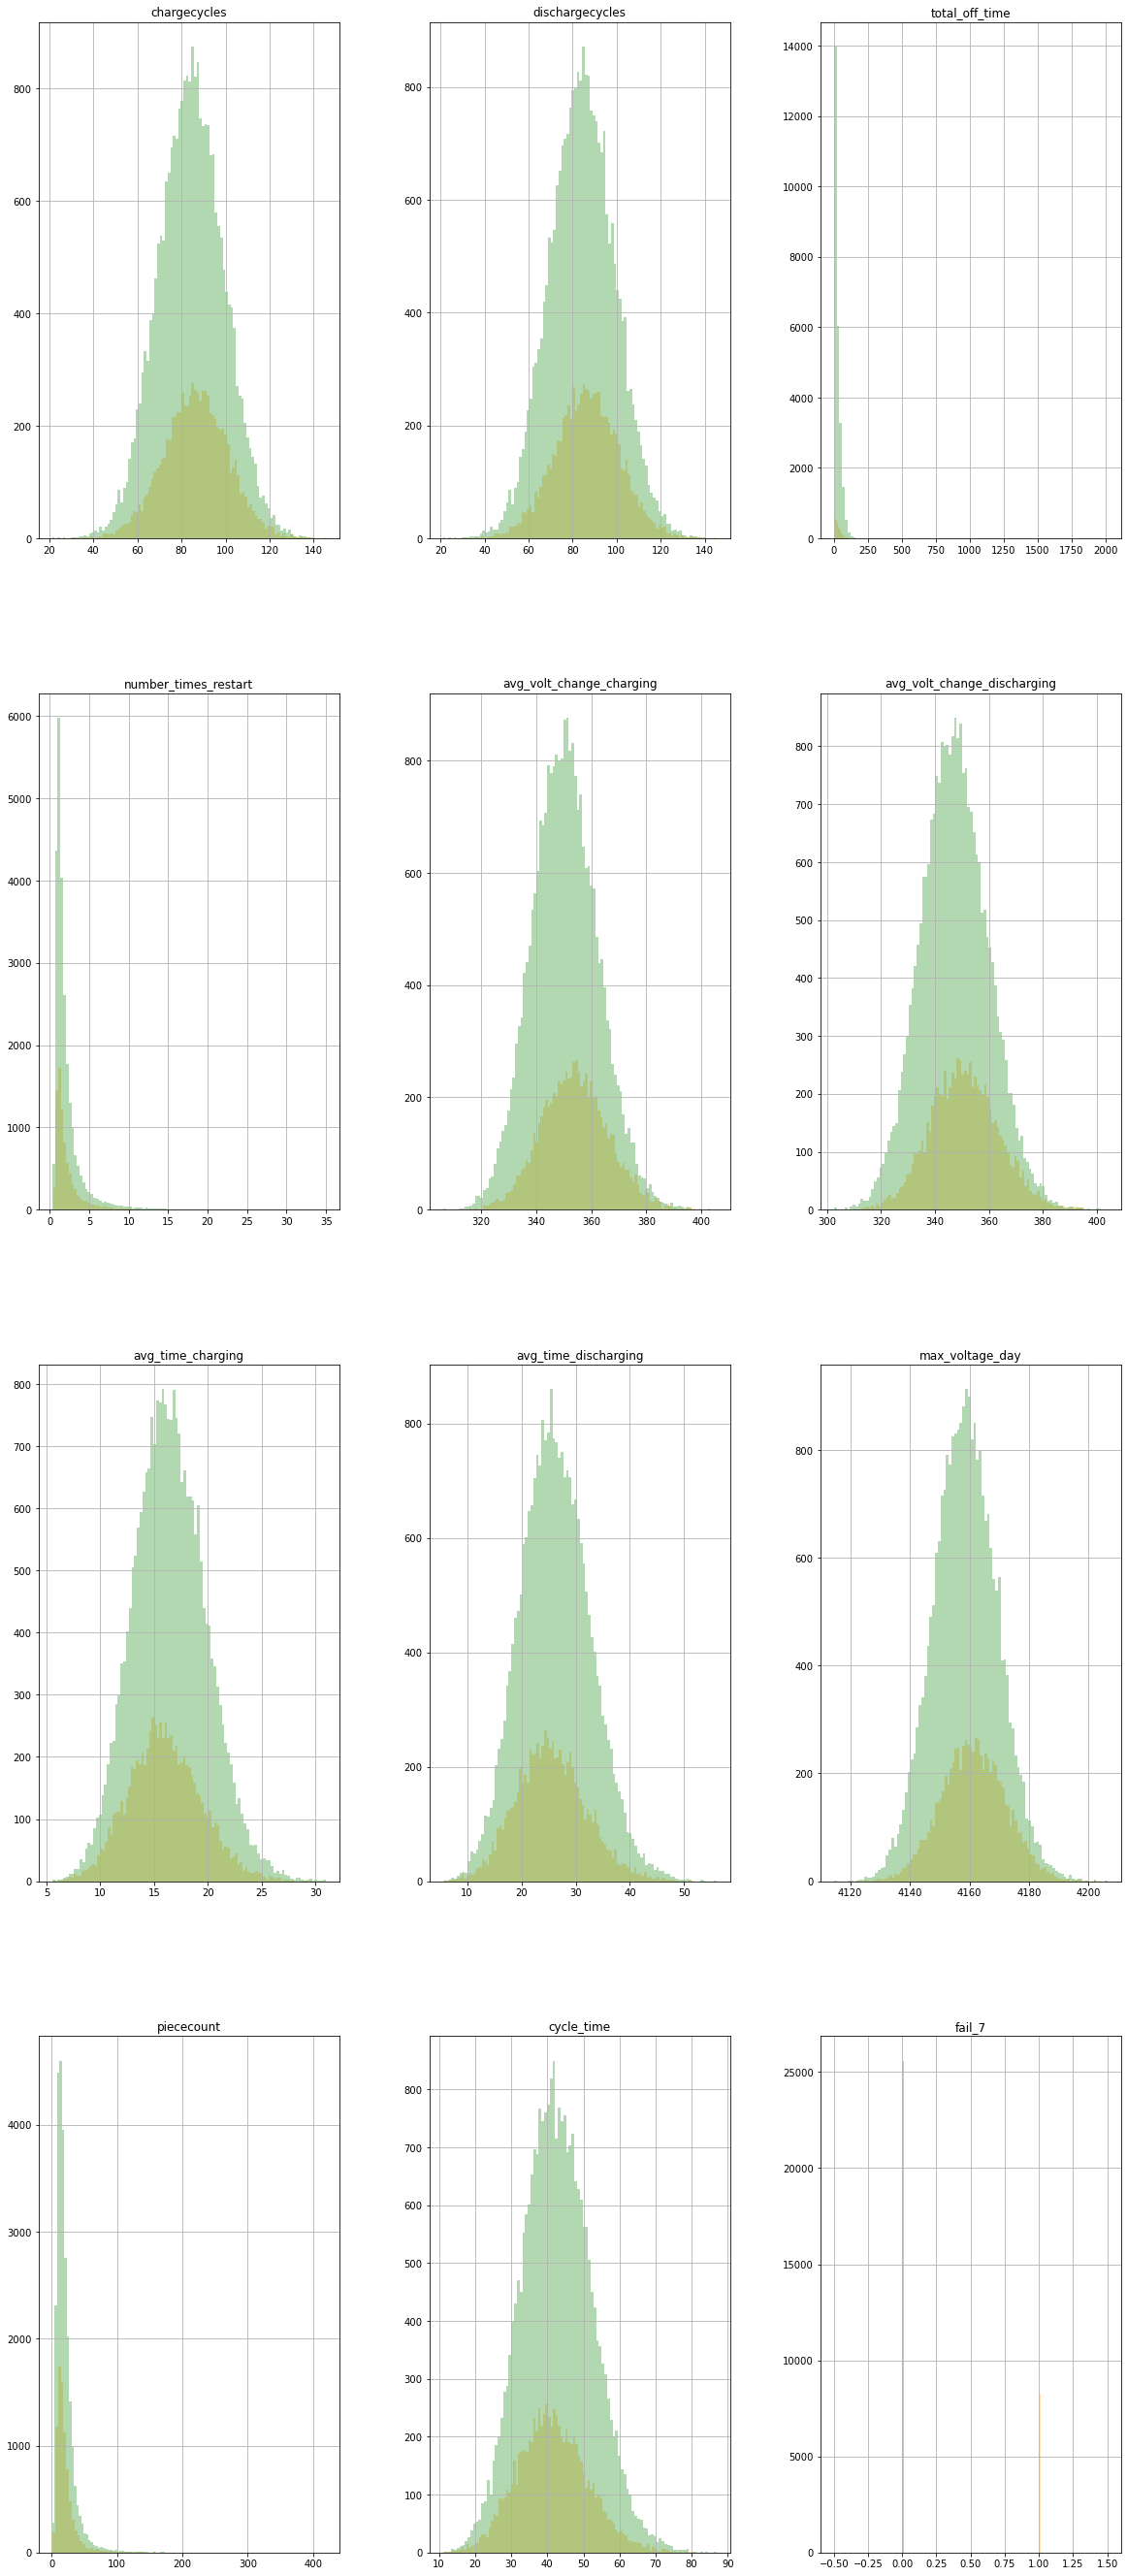

In [42]:
import matplotlib.pyplot as plt

index = newdf.select_dtypes(include=["float","int"]).columns
index = index.drop('deviceid')
cols=[i for i in index]

fig, axes = plt.subplots(len(cols)//3, 3, figsize=(20, 48))

i = 0
for triaxis in axes:
    for axis in triaxis:
        failed.hist(column = cols[i], bins = 100, ax=axis, color = 'orange', alpha = 0.3)
        nofail.hist(column = cols[i], bins = 100, ax=axis, color = 'green', alpha = 0.3)
        i = i+1

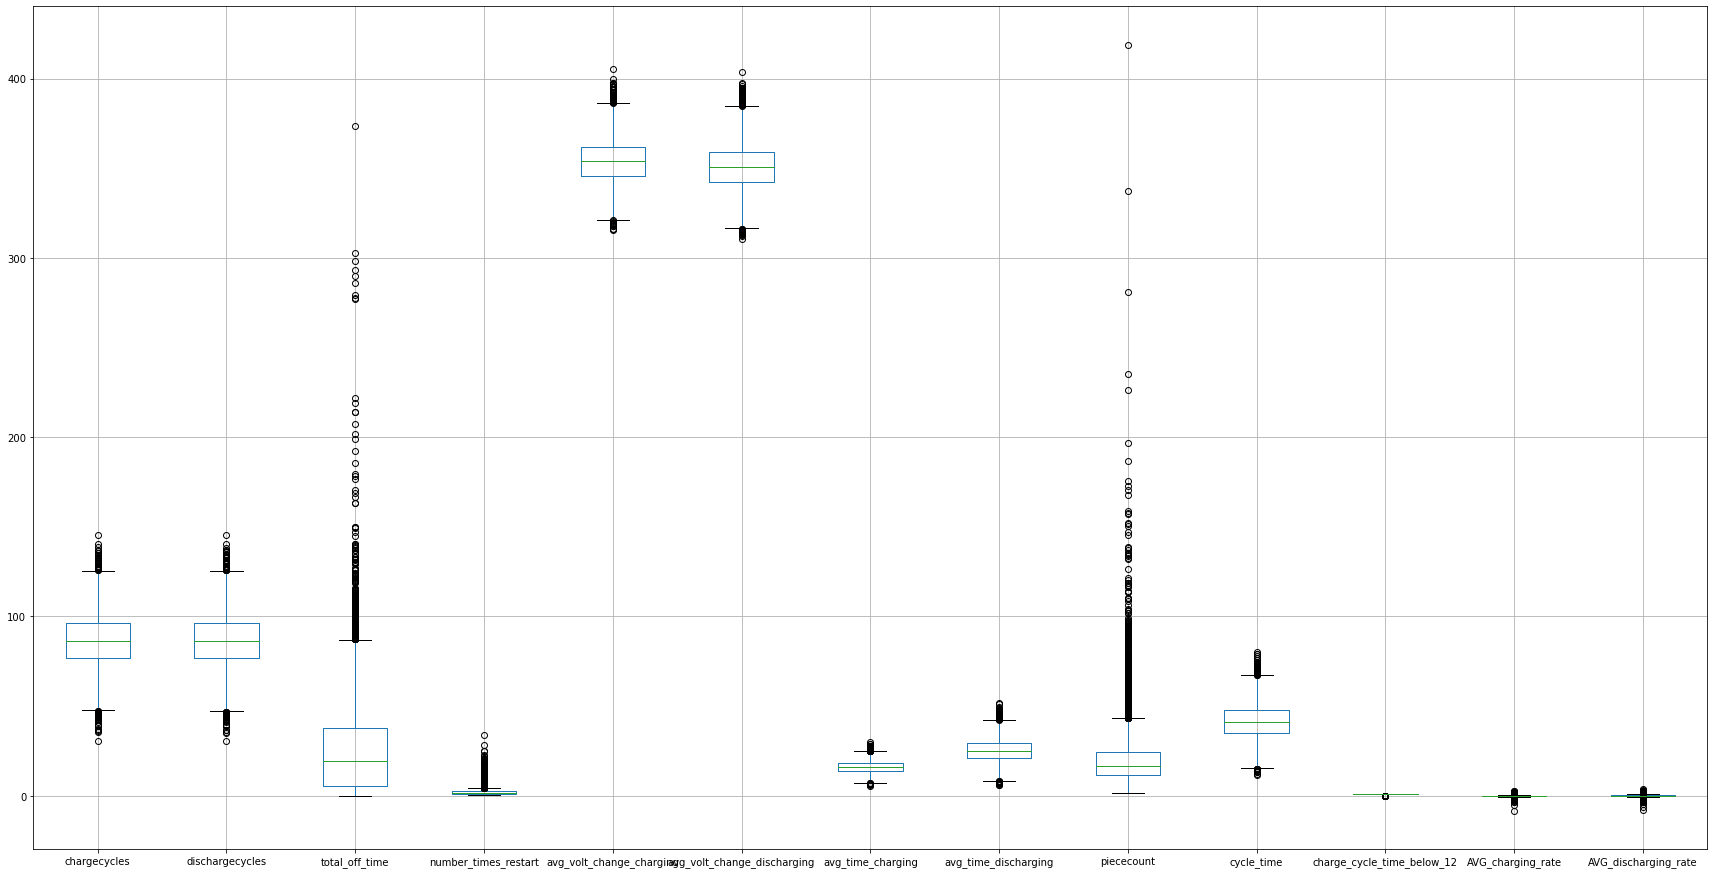

In [25]:
failed.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))
plt.show()

<AxesSubplot:>

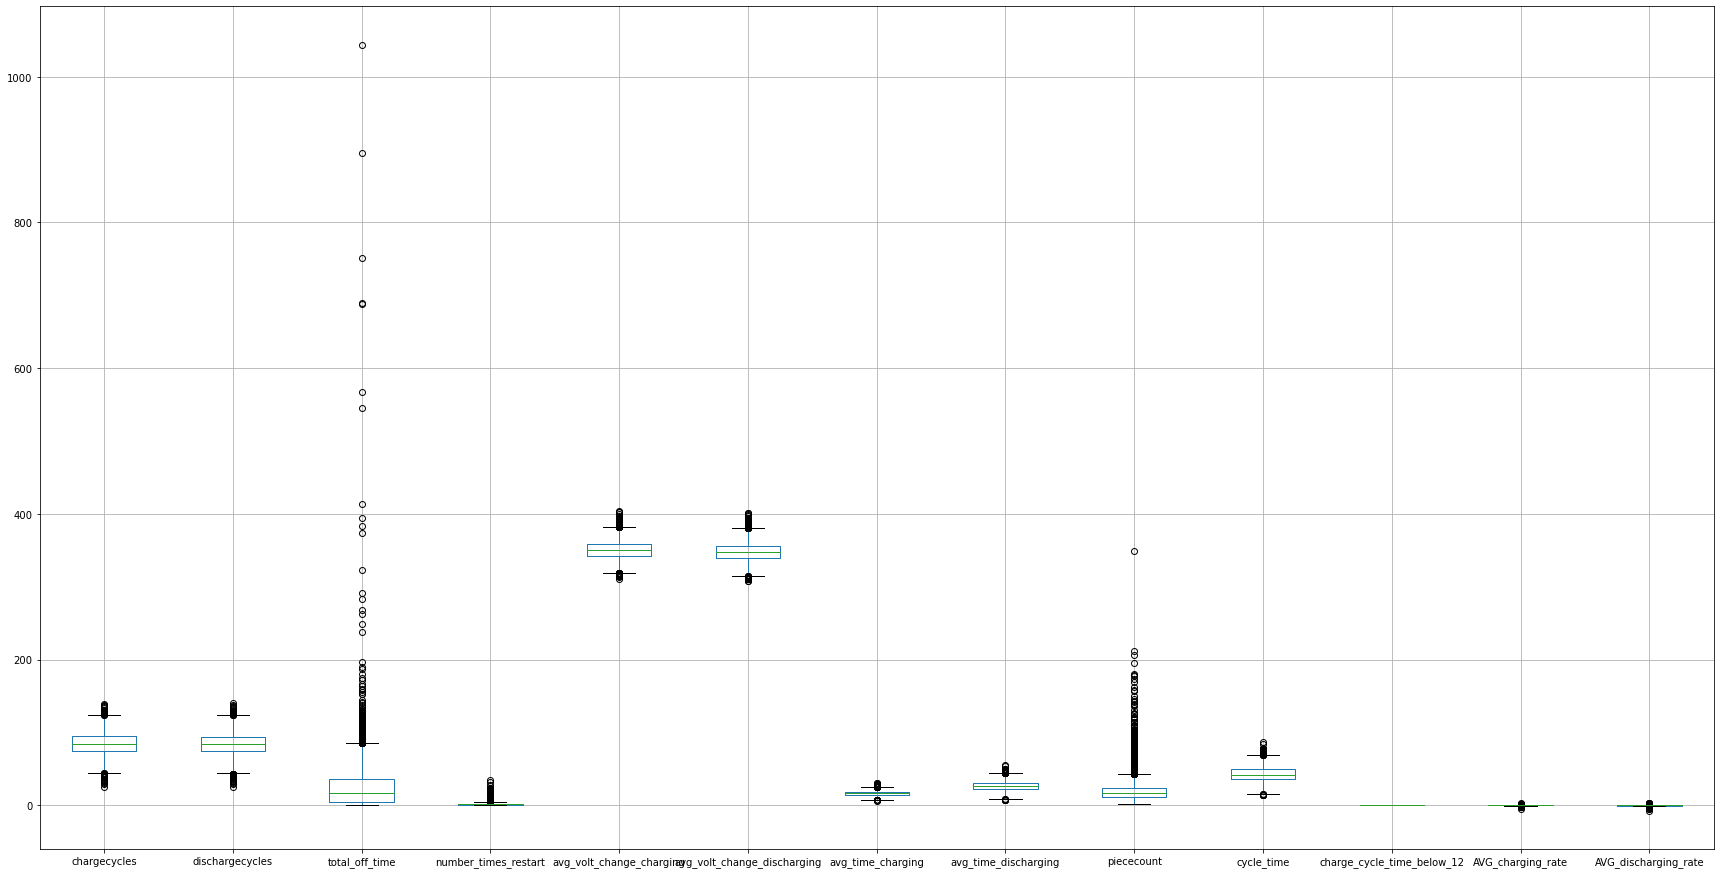

In [26]:
from scipy import stats

#df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
nofail.sample(8241).drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))

In [27]:
tot_0_mask = newdf['total_off_time'] == 0 
tot_0 = newdf[tot_0_mask]
tot_0.fail_7.value_counts(normalize=True)

#When total off time is 0, 16% of devices fail

0    0.835853
1    0.164147
Name: fail_7, dtype: float64

In [28]:
tot_max_fail_mask = newdf['total_off_time'] > 374
tot_max_fail = newdf[tot_max_fail_mask]
tot_max_fail.fail_7.value_counts(normalize=True)

0    1.0
Name: fail_7, dtype: float64

<AxesSubplot:>

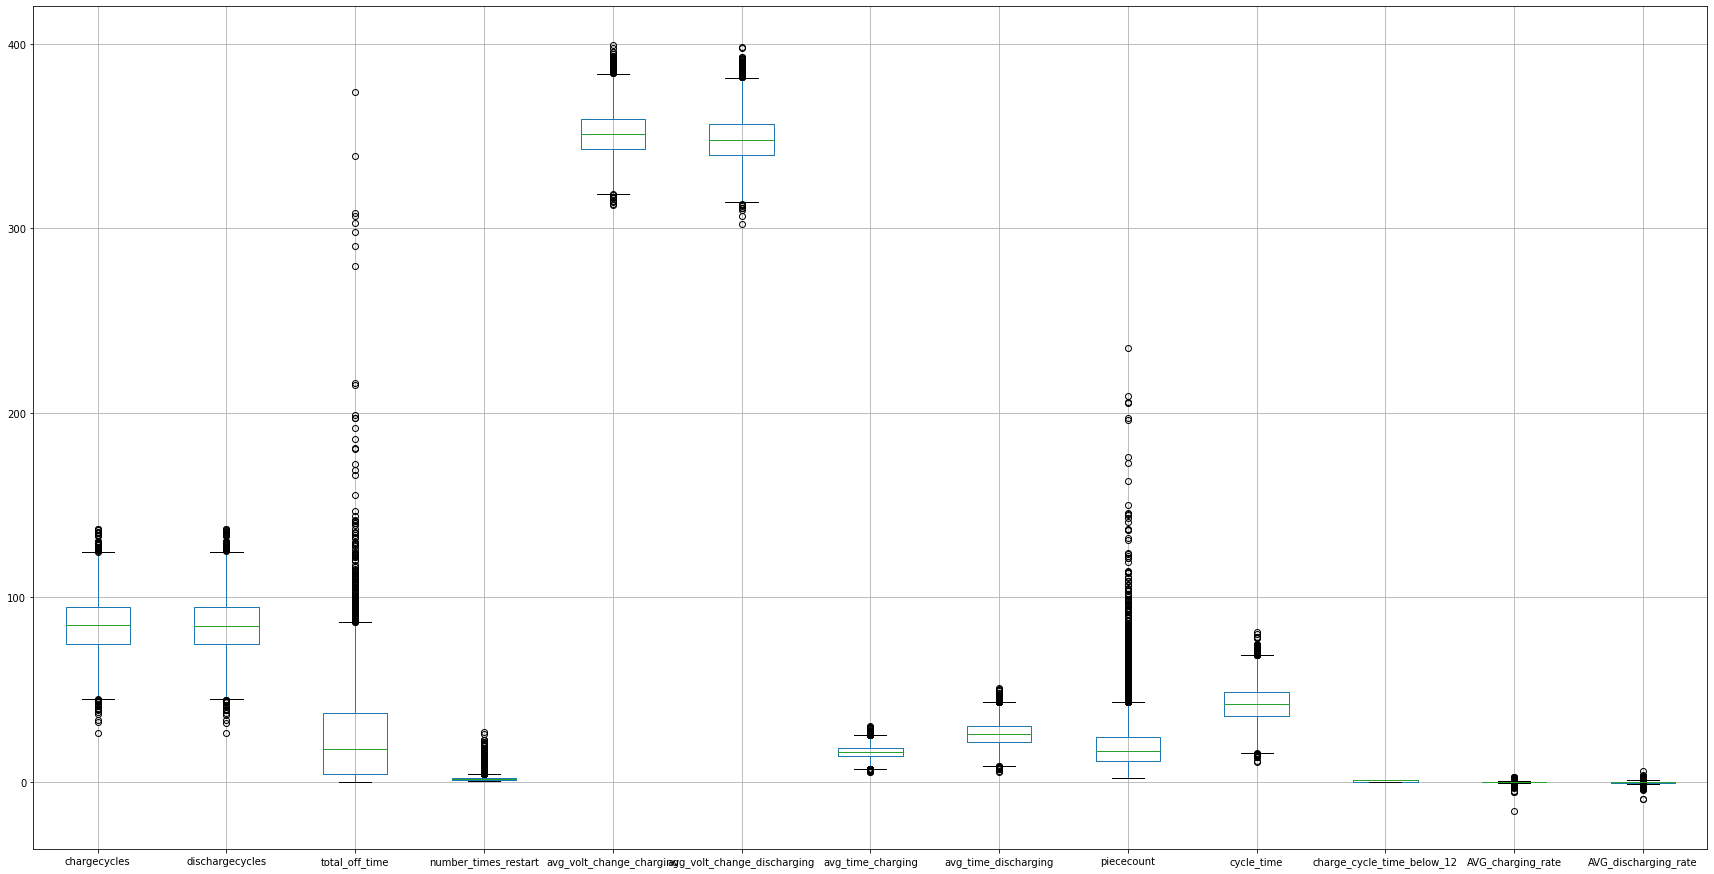

In [29]:
tot_mask = newdf['total_off_time'] < 374

#tot_ is df with only devices that were active, total off time less than 374

tot_ = newdf[tot_mask]

tot_.sample(8241).drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))

<AxesSubplot:>

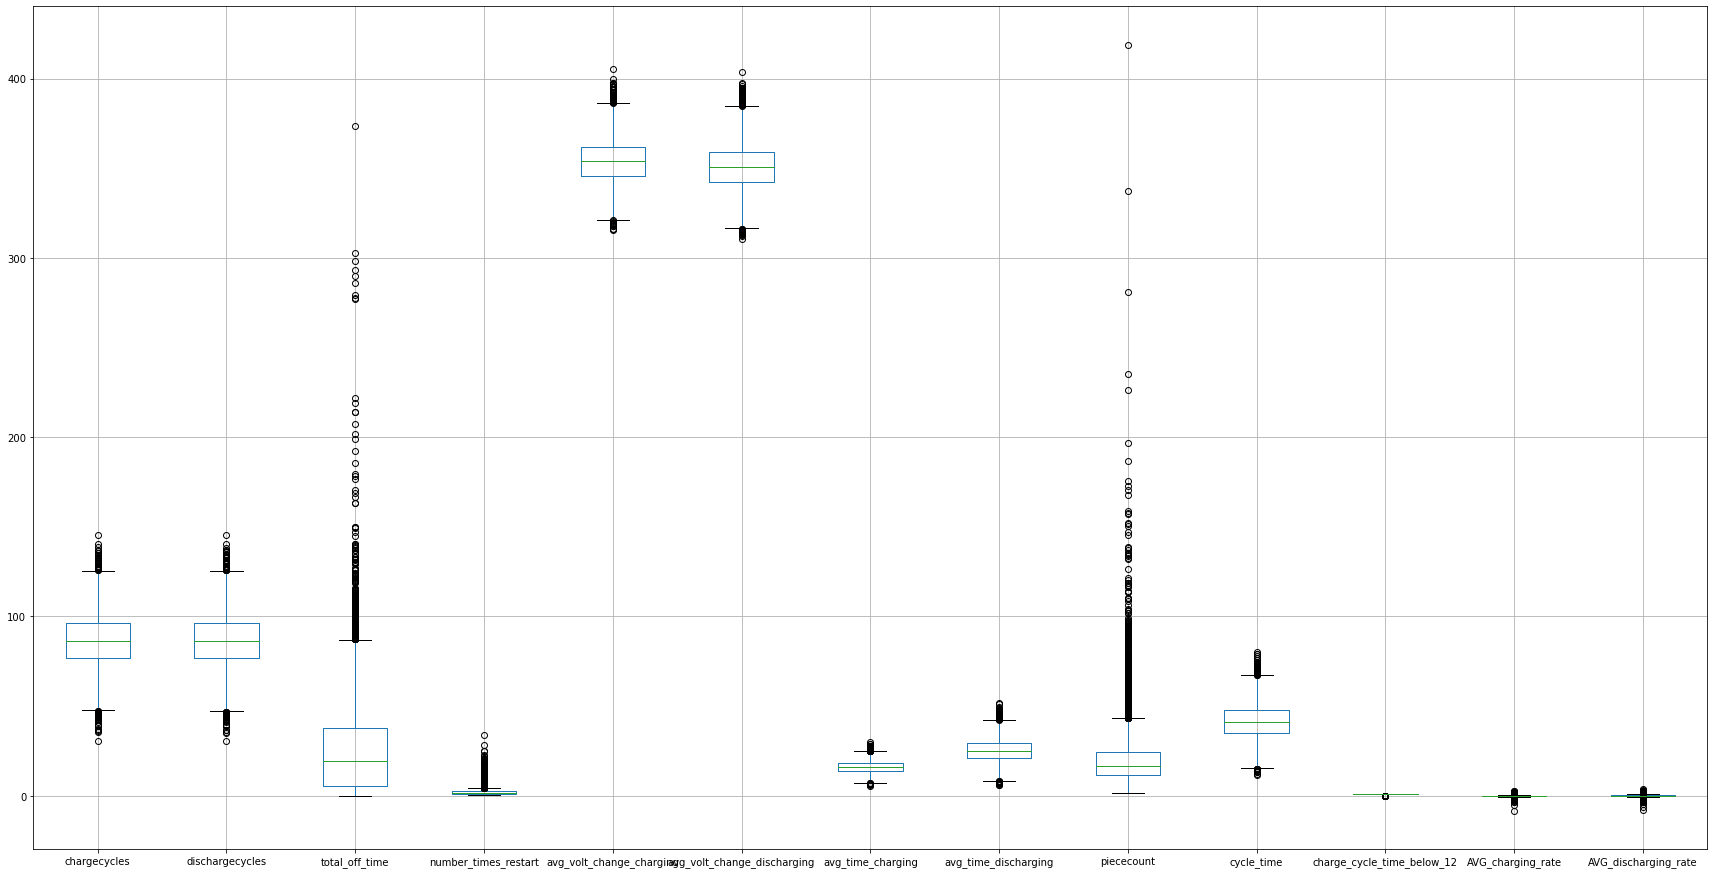

In [30]:
tot_fail = tot_[tot_['fail_7'] == 1]

tot_fail.drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))

<AxesSubplot:>

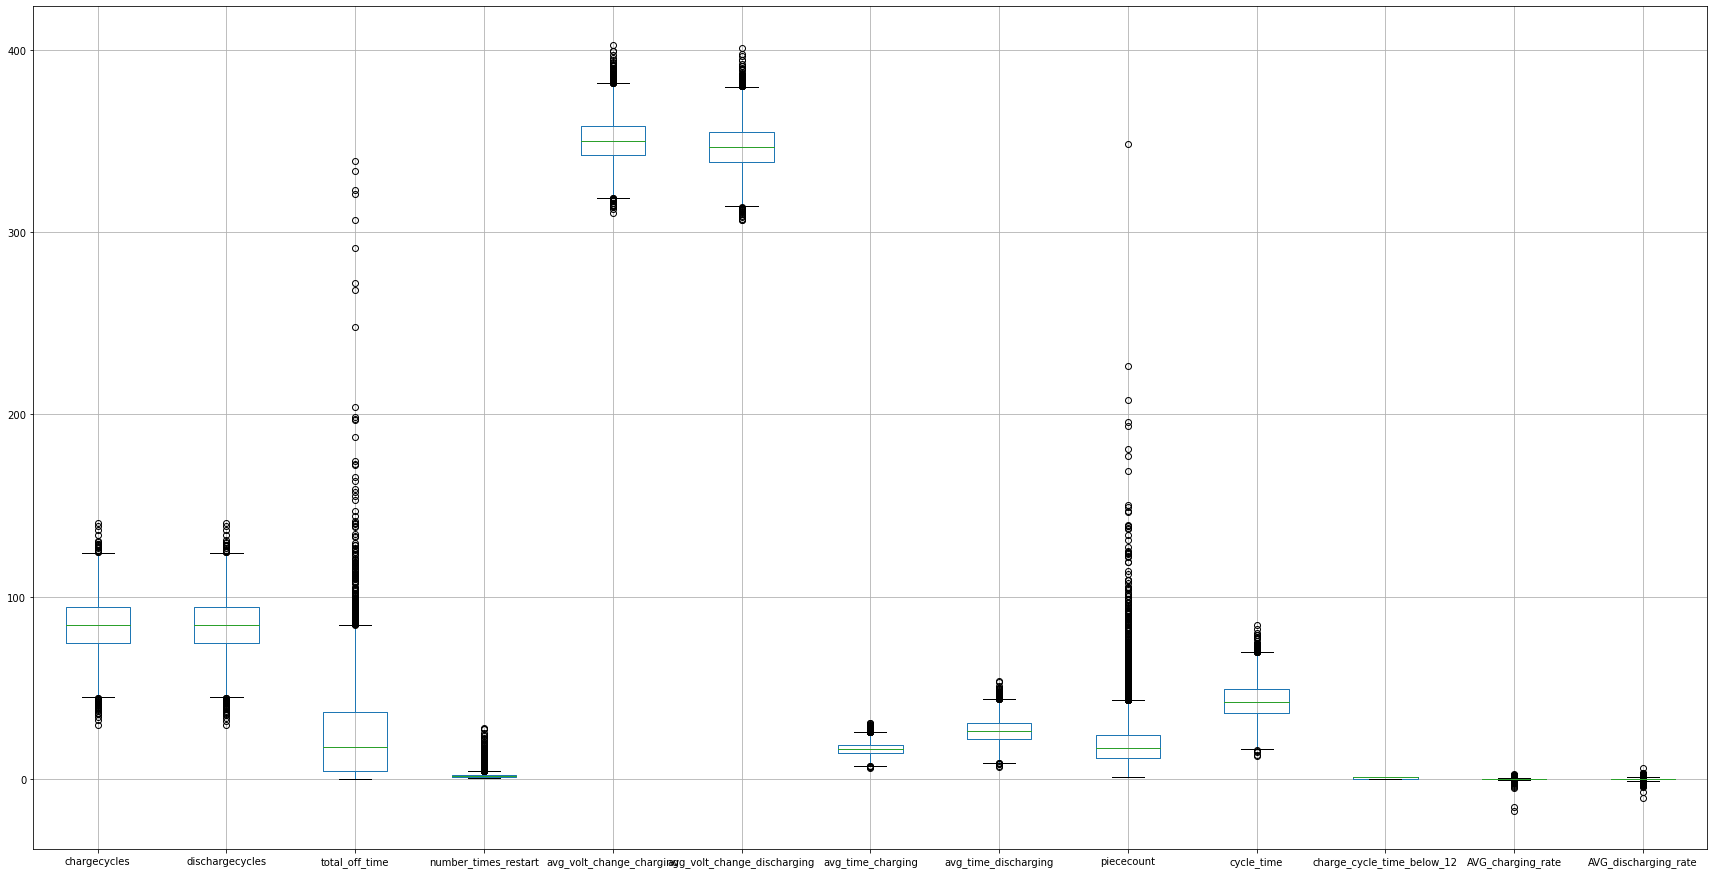

In [31]:
tot_nofail = tot_[tot_['fail_7'] == 0]

tot_nofail.sample(8451).drop(columns=["deviceid","fail_7", "max_voltage_day"]).boxplot(figsize=(30,15.5))

In [32]:
#bool col CCTB12 True is when total charges cyles time less than 12 units (which is normal)

norm_charge_false_mask = newdf['charge_cycle_time_below_12'] == False

norm_charge_true_mask = newdf['charge_cycle_time_below_12'] == True

In [33]:
newdf[norm_charge_false_mask].fail_7.value_counts(normalize = True)

0    0.909256
1    0.090744
Name: fail_7, dtype: float64

In [34]:
newdf[norm_charge_true_mask].fail_7.value_counts(normalize = True)

0    0.651726
1    0.348274
Name: fail_7, dtype: float64

In [35]:
norm_charge_true = newdf[norm_charge_true_mask]

In [36]:
norm_charge_true.describe()

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7,AVG_charging_rate,AVG_discharging_rate
count,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000,20079.000000
mean,27549.489068,87.332010,87.219226,25.083908,2.160911,351.965343,348.899519,15.855315,25.136098,4159.786822,20.732292,40.991412,0.348274,-0.041181,-0.096928
std,12921.811544,14.540250,14.577094,31.741896,2.159283,12.258620,12.729837,3.293806,6.315109,10.848587,16.450191,9.566810,0.476435,0.340568,0.512669
min,5001.000000,32.312500,31.937500,0.000000,0.294118,306.169000,302.655000,5.522667,5.570667,4119.578947,1.000000,11.093333,0.000000,-17.414000,-7.851111
25%,16415.500000,77.565217,77.438750,4.314145,1.068966,343.415345,340.192426,13.582500,20.762435,4152.333333,11.625000,34.397059,0.000000,-0.156000,-0.294444
50%,27491.000000,87.227273,87.111111,17.727273,1.500000,351.644375,348.534444,15.742667,24.914286,4159.600000,16.750000,40.698261,0.000000,-0.014667,-0.051111
75%,38750.000000,97.090909,97.000000,37.023810,2.366667,360.124300,357.373213,18.020278,29.273379,4167.139611,24.400000,47.258712,1.000000,0.089333,0.136667
max,49997.000000,145.388889,145.333333,1490.789474,34.933333,405.446111,403.850000,30.448750,50.543333,4206.235294,418.916667,79.210625,1.000000,2.679333,3.840000


In [37]:
newdf.describe()

,deviceid,chargecycles,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,fail_7,AVG_charging_rate,AVG_discharging_rate
count,33832.000000,33832.000000,33832.000000,33832.00000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000,33832.000000
mean,27523.530415,84.952507,84.833228,25.23022,2.153646,351.412834,348.205980,16.354944,26.083136,4159.255202,20.577940,42.438081,0.243586,-0.043888,-0.102888
std,12966.496729,14.779124,14.817297,34.50949,2.125769,12.142624,12.632874,3.385811,6.484972,10.783707,15.987928,9.826729,0.429252,0.348951,0.550366
min,5000.000000,21.312500,21.062500,0.00000,0.294118,306.169000,302.499048,5.522667,5.570667,4114.466667,1.000000,11.093333,0.000000,-17.414000,-10.627778
25%,16294.750000,75.000000,74.850000,4.40000,1.066667,343.071682,339.657667,14.021681,21.606456,4151.940257,11.571429,35.682283,0.000000,-0.180667,-0.321111
50%,27504.500000,84.941176,84.811012,17.87500,1.500000,351.126905,347.891278,16.221378,25.809028,4159.133333,16.727273,42.036583,0.000000,-0.020000,-0.060000
75%,38774.250000,94.833333,94.739130,37.00000,2.375000,359.403437,356.521094,18.579420,30.316052,4166.500000,24.333333,48.875312,0.000000,0.104000,0.152222
max,49998.000000,145.388889,145.333333,2013.00000,34.933333,405.446111,403.850000,30.937059,55.925789,4206.235294,418.916667,86.853158,1.000000,3.878667,5.873333


In [38]:
#norm_charge_true.to_csv('norm_charge_true.csv', index = False)


All observations


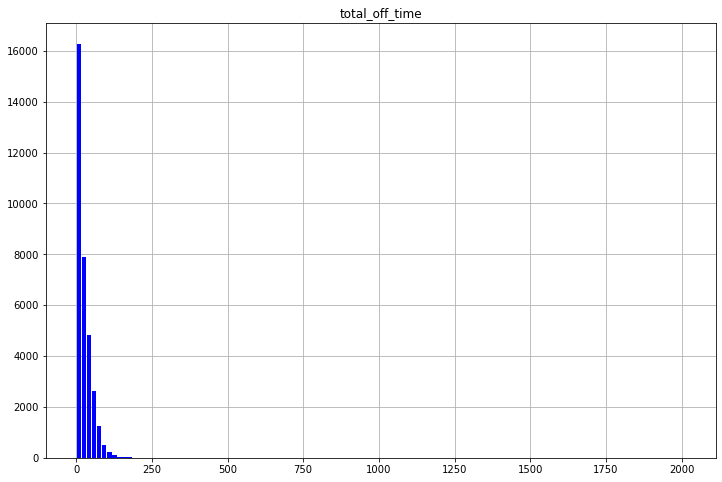

In [39]:
#failed.hist(x = 'total_off_time', bins = 100, color = 'orange', alpha = 0.3)
#nofail.hist(column = 'total_off_time', bins = 100, ax=axis, color = 'green', alpha = 0.3)

print('All observations')
display(ax = newdf.hist(column='total_off_time', bins=120, figsize=(12,8), color='blue', zorder=2, rwidth=0.9))


Fail


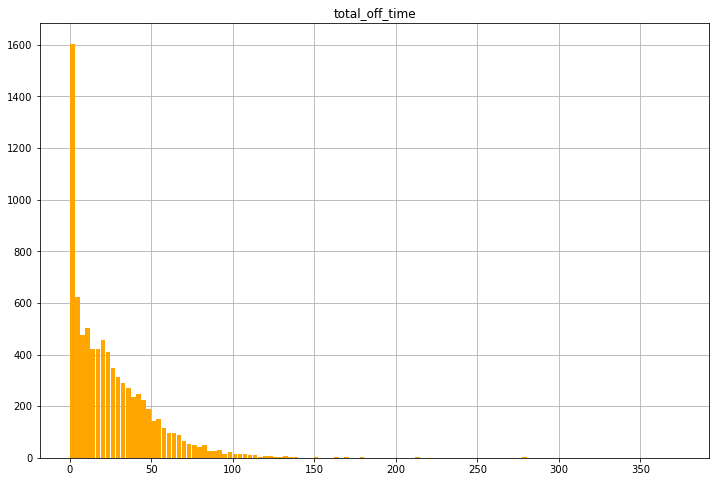

In [40]:
print('Fail')
display(ax = failed.hist(column='total_off_time', bins=120, figsize=(12,8), color='orange', zorder=2, rwidth=0.9))


No Fail


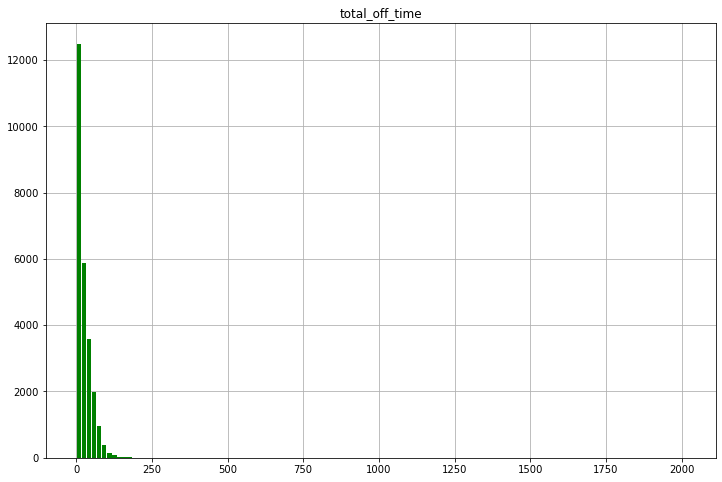

In [41]:
print('No Fail')
ax = nofail.hist(column='total_off_time', bins=120, figsize=(12,8), color='green', zorder=2, rwidth=0.9)